In [59]:
import serfilesreader

In [60]:
# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 1, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [61]:
import numpy as np
from photutils.datasets import make_4gaussians_image
from photutils.centroids import (centroid_1dg, centroid_2dg,
                                 centroid_com, centroid_quadratic)
from dask.distributed import LocalCluster

In [62]:
from numpy import ndarray
def centroid_from_frame(frame: ndarray, width, height) -> ndarray:
    com = centroid_com(frame)
    return { "x": com[0], "y": com[1] }
    

In [63]:
serfile = "21_07_37.ser"
from serfilesreader import Serfile
capture = Serfile(serfile, False)

In [64]:
def iterate_frames(capture: ndarray):
    capture.setCurrentPosition(0)
    frame = 0
    while frame != -1:
        yield (capture.getHeader(), capture.read(), capture.getHeight(), capture.getWidth())
        frame = capture.nextFrame()
    else:
        return

In [65]:
import pandas as pd

positions = []

for header, frame, height, width in iterate_frames(capture):
    if not isinstance(frame[0], int):
        com = (centroid_from_frame(frame[0], width, height))
        positions.append(com)
    
df = pd.DataFrame(positions)


(63.50307345612253, 63.61975111379454, 53.48076881701573, 53.56042224802511)

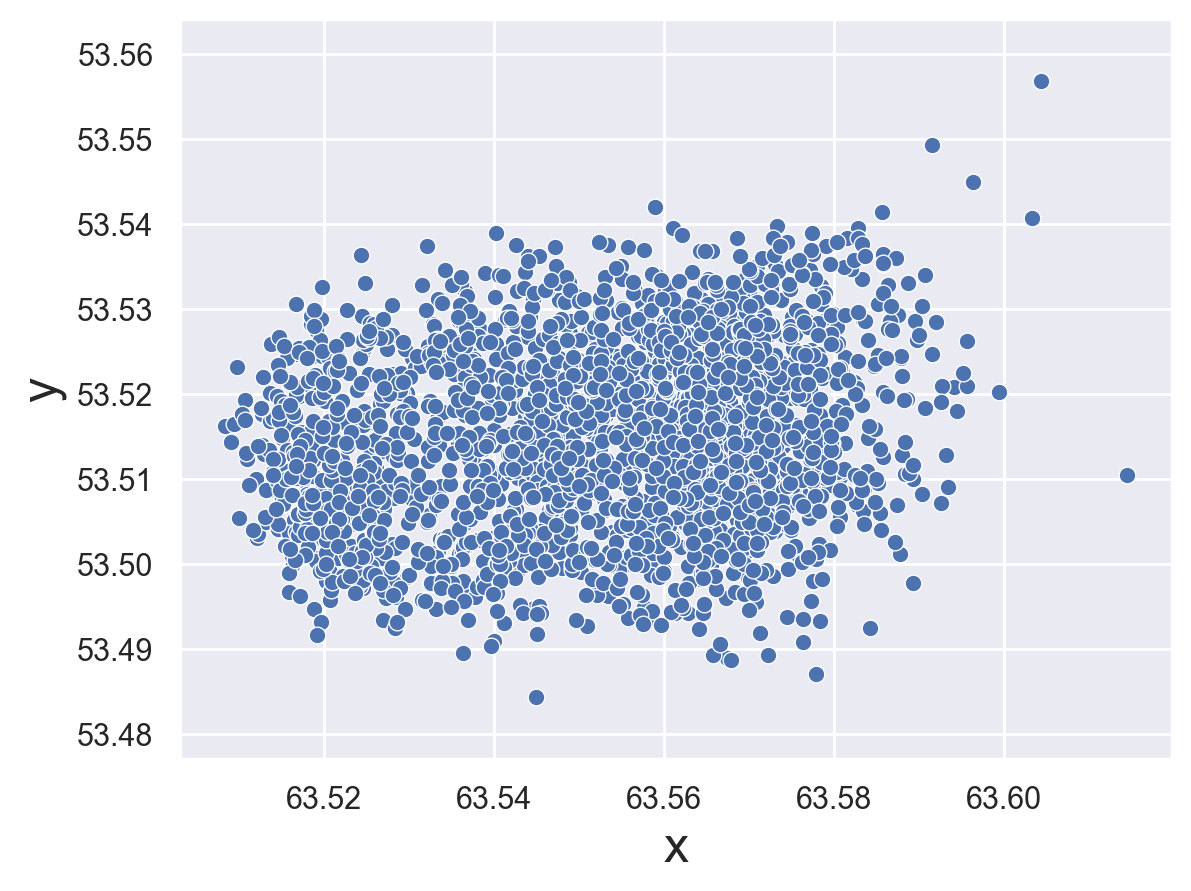

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = sns.scatterplot(data=df, x="x", y="y")
ax.set_aspect('equal')
ax.axis('equal')


In [67]:
offset = df - df.mean()

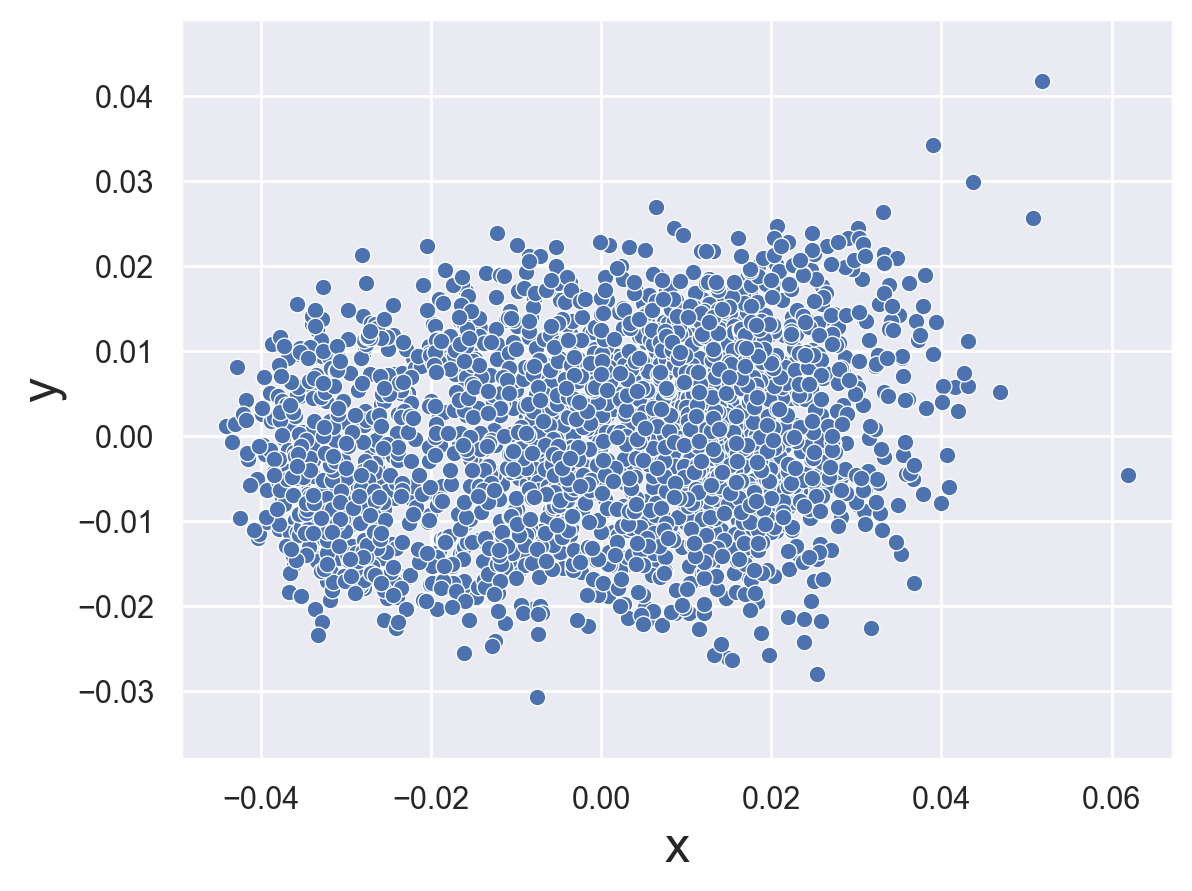

In [68]:
fig = plt.figure()
ax = sns.scatterplot(data=offset, x="x", y="y")
ax.set_aspect('equal')
ax.axis('equal')
fig.savefig(f"{serfile} scatter.png")

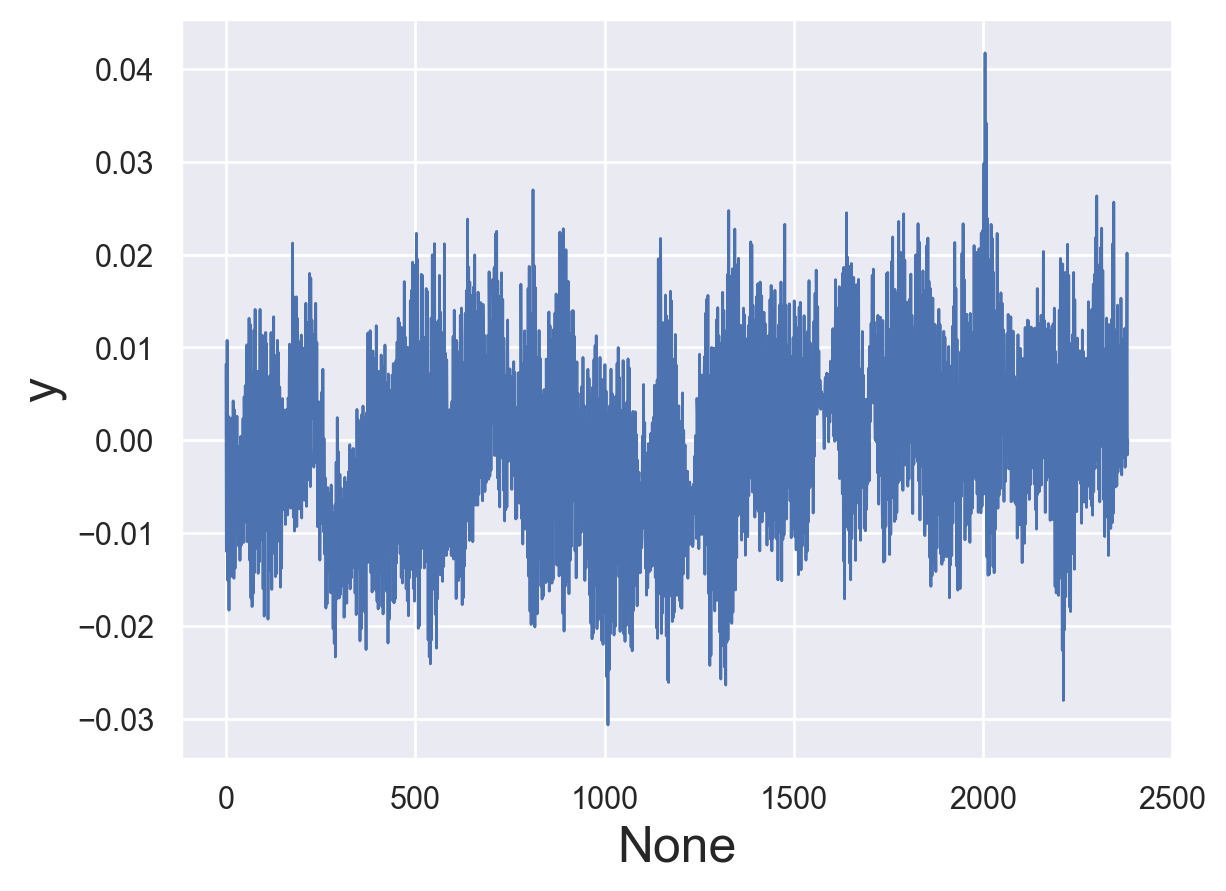

In [69]:
fig = plt.figure()
ax = sns.lineplot(data=offset, x=offset.index, y="y",)
fig.savefig(f"{serfile} DEC_centroid.png")

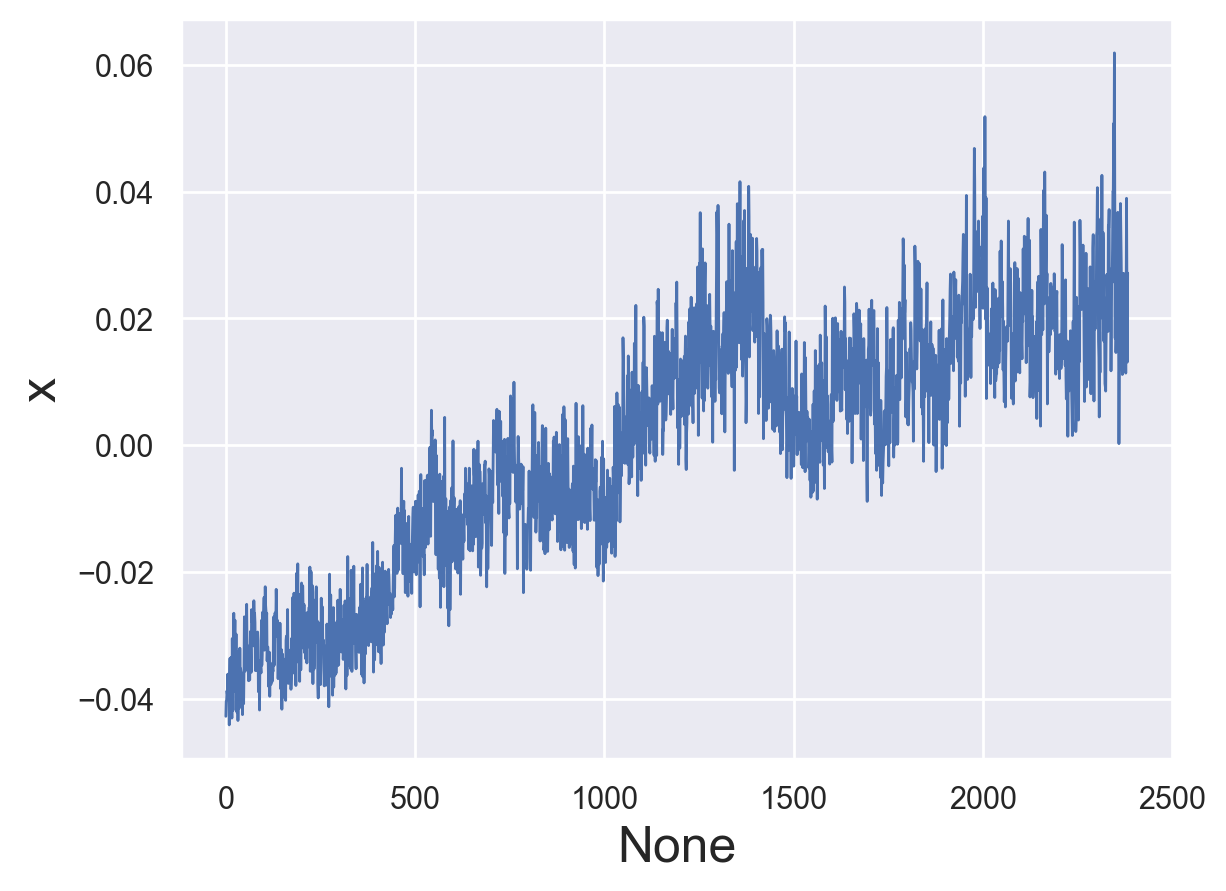

In [70]:
fig = plt.figure()
sns.lineplot(data=offset, x=offset.index, y="x",)
fig.savefig(f"{serfile} RA_centroid.png")

In [71]:
from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(offset.index, y=offset["x"])

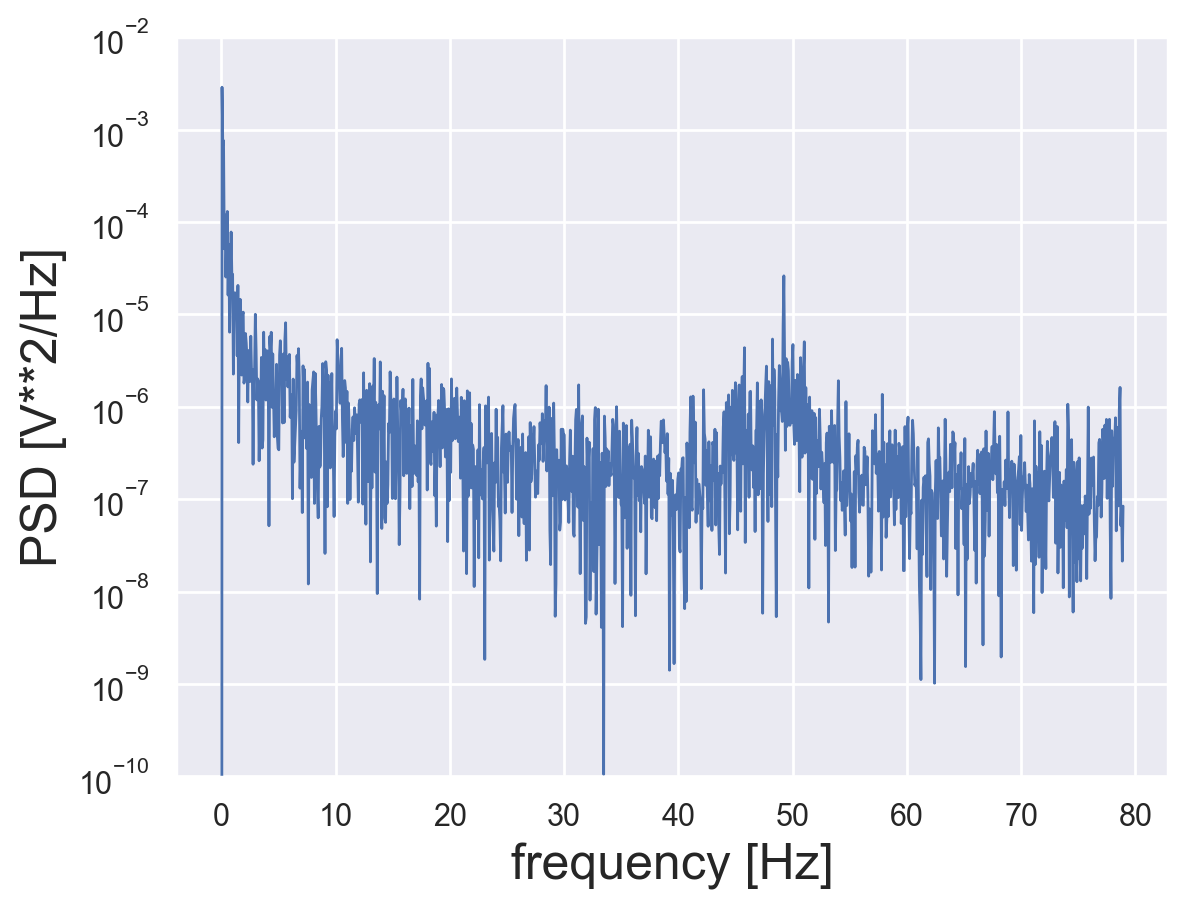

In [73]:
from scipy import signal

f, Pxx_den = signal.periodogram(offset["x"], 157.9150)

fig = plt.figure()

ax = plt.semilogy(f, Pxx_den)

plt.ylim([1e-10, 1e-2])

plt.xlabel('frequency [Hz]')

plt.ylabel('PSD [V**2/Hz]')

plt.show()
fig.savefig(f"{serfile} ffm x.png")

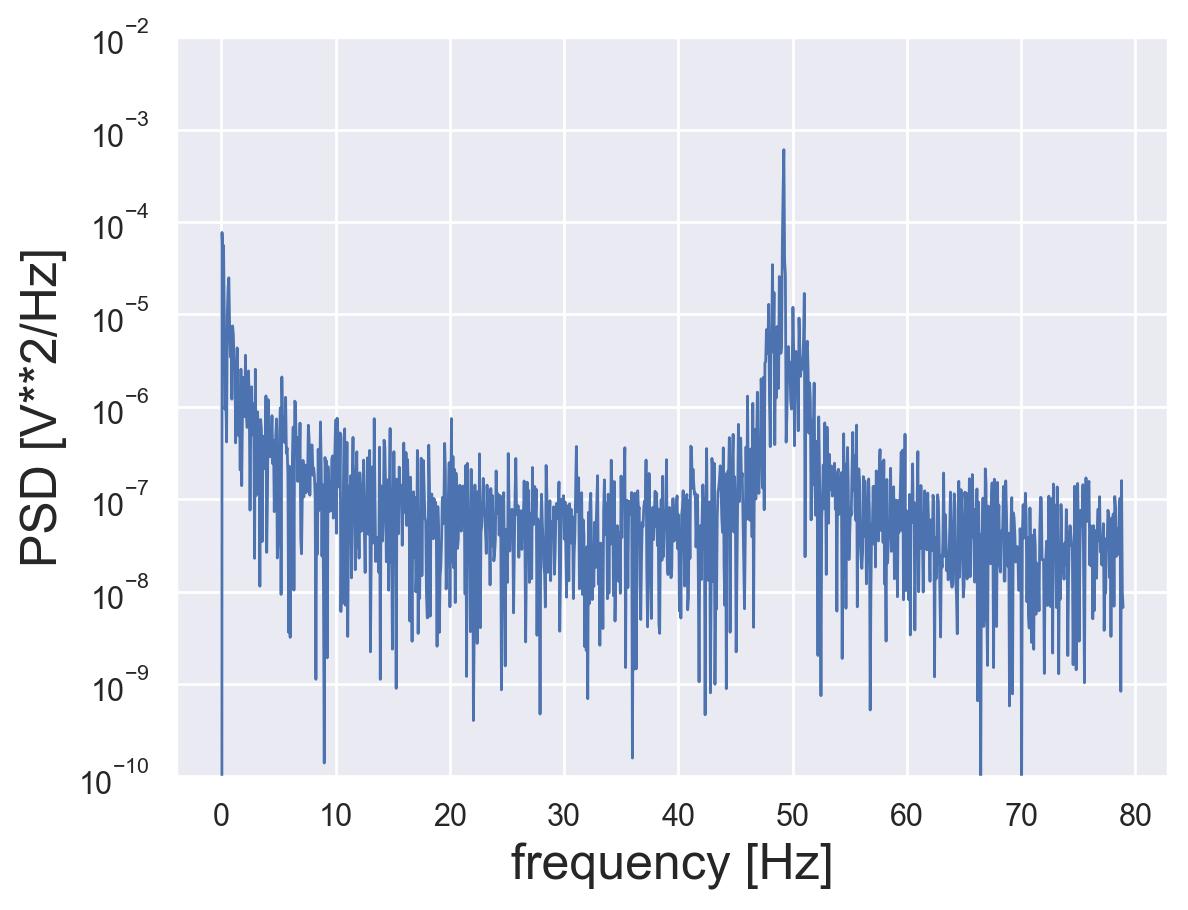

In [74]:
from scipy import signal

f, Pxx_den = signal.periodogram(offset["y"], 157.9150)

fig = plt.figure()

ax = plt.semilogy(f, Pxx_den)

plt.ylim([1e-10, 1e-2])

plt.xlabel('frequency [Hz]')

plt.ylabel('PSD [V**2/Hz]')

plt.show()
fig.savefig(f"{serfile} ffm y.png")